# Import Library and Dataset

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# Load the preprocessed dataset from Excel file
df = pd.read_excel("C:\\Users\\Chai\\Desktop\\FYP_dataset\\preprocessed_data.xlsx")

# Features and target variable
X = df.drop('Status', axis=1)
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =================================================

# Random Forest

## Random Forest Base Model

In [ ]:
# Define the parameters for the Random Forest model
base_model_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': 42,
    'bootstrap': True,
    'max_features': 'sqrt', 
    'min_samples_split': 2,   
    'min_samples_leaf': 1,    
    'criterion': 'gini'        
}

# Train a Random Forest model
base_model = RandomForestClassifier(**base_model_params) 
base_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Evaluate on the training set
base_train_predictions = base_model.predict(X_train)
base_train_accuracy = accuracy_score(y_train, base_train_predictions)
print(f"Training Accuracy: {base_train_accuracy:.4f}")

# Evaluate on the testing set
base_test_predictions = base_model.predict(X_test)
base_test_accuracy = accuracy_score(y_test, base_test_predictions)
print(f"Testing Accuracy: {base_test_accuracy:.4f}")

# Print classification report for training set
print("Classification Report on Training Set:")
print(classification_report(y_train, base_train_predictions))

# Print classification report for testing set
print("Classification Report on Testing Set:")
print(classification_report(y_test, base_test_predictions))

# 0 = default!!!, 1 = non-default

Training Accuracy: 0.8064
Testing Accuracy: 0.7963
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81     51480
           1       0.84      0.76      0.80     51496

    accuracy                           0.81    102976
   macro avg       0.81      0.81      0.81    102976
weighted avg       0.81      0.81      0.81    102976

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81     12880
           1       0.83      0.75      0.79     12864

    accuracy                           0.80     25744
   macro avg       0.80      0.80      0.80     25744
weighted avg       0.80      0.80      0.80     25744



## Random Forest Random Search 

### Define the Parameter Grid

In [ ]:
param_dist = {
    'max_depth': [None] + list(range(1, 11)),
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_samples_leaf': [4, 6, 8, 10, 12],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']
}

### Initialize the Model and RandomSearchCV

In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setup the random search with 10-fold cross validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)

### Fit the Model

In [ ]:
# Fit RandomizedSearchCV to the training data
grid_result = rf_random.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best Parameters: {rf_random.best_params_}")
print(f"Best Score: {rf_random.best_score_:.4f}")

# Display detailed results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 40, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Best Score: 0.9073
0.647792 (0.004873) with: {'n_estimators': 400, 'min_samples_split': 30, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 2, 'criterion': 'entropy', 'bootstrap': True}
0.761721 (0.004436) with: {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}
0.568968 (0.002826) with: {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 2, 'criterion': 'gini', 'bootstrap': True}
0.775559 (0.004113) with: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}
0.907328 (0.003426) with: {'n_estimat

### Evaluate the Best Model

In [ ]:
# Get the best model
best_model = rf_random.best_estimator_

# Evaluate the model on the training set
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the testing set
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report for training set
print("Classification Report on Training Set:")
print(classification_report(y_train, train_predictions))

# Print classification report for testing set
print("Classification Report on Testing Set:")
print(classification_report(y_test, test_predictions))

Training Accuracy: 0.9363
Testing Accuracy: 0.9100
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     51480
           1       0.96      0.91      0.93     51496

    accuracy                           0.94    102976
   macro avg       0.94      0.94      0.94    102976
weighted avg       0.94      0.94      0.94    102976

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12880
           1       0.94      0.88      0.91     12864

    accuracy                           0.91     25744
   macro avg       0.91      0.91      0.91     25744
weighted avg       0.91      0.91      0.91     25744



## Comparision Table

In [ ]:
# Convert best_params to a string
best_params_str = str(rf_random.best_params_)

# Set display options to show full content
pd.set_option('display.max_colwidth', None)

# Comparison Table
data = {
    "Metric": ["Training Accuracy", "Testing Accuracy", "Best Parameters"],
    "Base Model": [base_train_accuracy, base_test_accuracy, base_model_params],
    "Random Search Model": [train_accuracy, test_accuracy, rf_random.best_params_]
}

comparison_table = pd.DataFrame(data)
comparison_table

,Metric,Base Model,Random Search Model
0,Training Accuracy,0.806363,0.936325
1,Testing Accuracy,0.796341,0.90996
2,Best Parameters,"{'n_estimators': 100, 'max_depth': 10, 'random_state': 42, 'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}","{'n_estimators': 500, 'min_samples_split': 40, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}"


## Final Model

### Define the Paramater Grid

In [1]:
optimized_rf_model_params = {
    'n_estimators': 500,
    'max_depth': None,
    'random_state': 42,
    'bootstrap': True,
    'max_features': None, 
    'min_samples_split': 40,   
    'min_samples_leaf': 8,    
    'criterion': 'entropy'        
}

### Train the optimized Random Forest model

In [5]:
optimized_rf_model = RandomForestClassifier(**optimized_rf_model_params)
optimized_rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=8, min_samples_split=40,
                       n_estimators=500, random_state=42)

### Result

In [ ]:
# Evaluate on the training set
optimized_rf_train_predictions = optimized_rf_model.predict(X_train)
optimized_rf_train_accuracy = accuracy_score(y_train, optimized_rf_train_predictions)
print(f"Optimized Training Accuracy: {optimized_rf_train_accuracy:.4f}")

# Evaluate on the testing set
optimized_rf_test_predictions = optimized_rf_model.predict(X_test)
optimized_rf_test_accuracy = accuracy_score(y_test, optimized_rf_test_predictions)
print(f"Optimized Testing Accuracy: {optimized_rf_test_accuracy:.4f}")

# Print classification report for training set
print("Optimized Classification Report on Training Set:")
print(classification_report(y_train, optimized_rf_train_predictions))

# Print classification report for testing set
print("Optimized Classification Report on Testing Set:")
print(classification_report(y_test, optimized_rf_test_predictions))

Optimized Training Accuracy: 0.9363
Optimized Testing Accuracy: 0.9100
Optimized Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     51480
           1       0.96      0.91      0.93     51496

    accuracy                           0.94    102976
   macro avg       0.94      0.94      0.94    102976
weighted avg       0.94      0.94      0.94    102976

Optimized Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12880
           1       0.94      0.88      0.91     12864

    accuracy                           0.91     25744
   macro avg       0.91      0.91      0.91     25744
weighted avg       0.91      0.91      0.91     25744



### Plot ROC Curve

RF Test ROC AUC: 0.9634


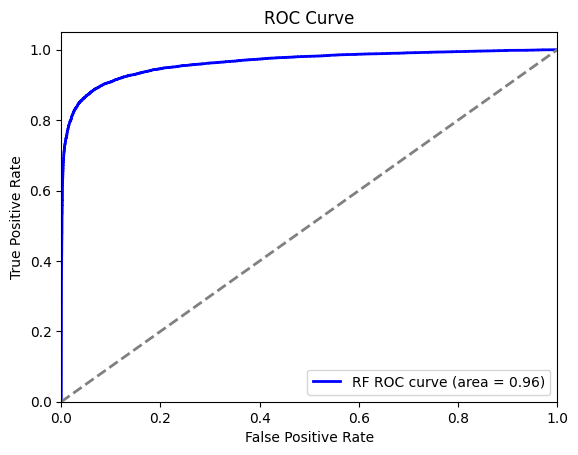

In [7]:
# Calculate ROC AUC for the testing set
rf_y_test_proba = optimized_rf_model.predict_proba(X_test)[:, 1]
rf_test_roc_auc = roc_auc_score(y_test, rf_y_test_proba)
print(f"RF Test ROC AUC: {rf_test_roc_auc:.4f}")

# Plot ROC curve for testing set
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_test_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'RF ROC curve (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

Confusion Matrix:
[[12120   760]
 [ 1558 11306]]


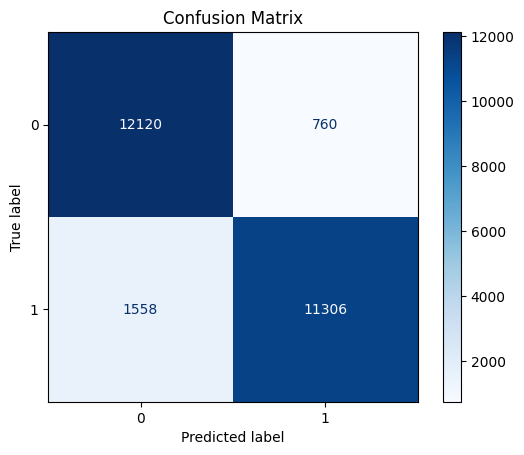

In [ ]:
# Calculate and print confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, optimized_rf_test_predictions)
print("Confusion Matrix:")
print(rf_confusion_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

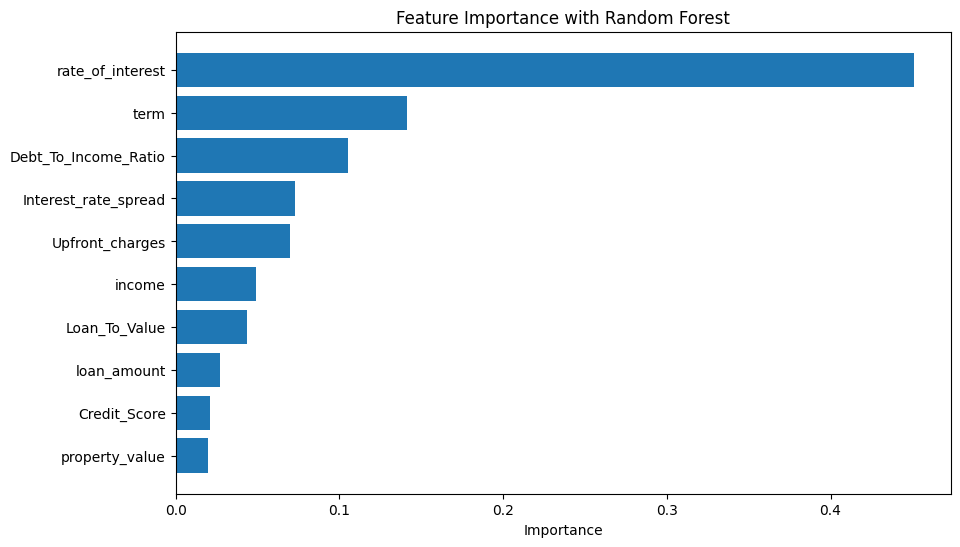

In [ ]:
# Calculate and plot feature importance
importances = optimized_rf_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance with Random Forest")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), names)
plt.xlabel("Importance")
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib_file = "optimized_rf_model.joblib"
joblib.dump(optimized_rf_model, joblib_file)
print(f"Model saved as {joblib_file}")

Model saved as optimized_rf_model.joblib


# =================================================

# Decision Tree

## Decision Tree Base Model

In [ ]:
# Define the parameters for the Decision Tree model
base_model_params = {
    'max_depth': 10,
    'min_samples_split': 2, 
    'min_samples_leaf': 1, 
    'criterion': 'gini', 
    'random_state': 42
}

# Train a Decision Tree model
base_model = DecisionTreeClassifier(**base_model_params)
base_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Evaluate on the training set
base_train_predictions = base_model.predict(X_train)
base_train_accuracy = accuracy_score(y_train, base_train_predictions)
print(f"Training Accuracy: {base_train_accuracy:.4f}")

# Evaluate on the testing set
base_test_predictions = base_model.predict(X_test)
base_test_accuracy = accuracy_score(y_test, base_test_predictions)
print(f"Testing Accuracy: {base_test_accuracy:.4f}")

# Print classification report for training set
print("Classification Report on Training Set:")
print(classification_report(y_train, base_train_predictions))

# Print classification report for testing set
print("Classification Report on Testing Set:")
print(classification_report(y_test, base_test_predictions))

Training Accuracy: 0.7557
Testing Accuracy: 0.7422
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78     51480
           1       0.82      0.66      0.73     51496

    accuracy                           0.76    102976
   macro avg       0.77      0.76      0.75    102976
weighted avg       0.77      0.76      0.75    102976

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     12880
           1       0.80      0.64      0.71     12864

    accuracy                           0.74     25744
   macro avg       0.75      0.74      0.74     25744
weighted avg       0.75      0.74      0.74     25744



## Decision Tree Grid Search 

### Define the Parameter Grid

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth':list(range(1,66)),
    'min_samples_split': [2, 15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
}

### Initialize the Model and GridSearchCV

In [ ]:
# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1,scoring='accuracy') 

### Fit the Model

In [ ]:
# Fit GridSearchCV to the training data
grid_result = dt_grid.fit(X_train, y_train)

print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best Score: {dt_grid.best_score_:.4f}")

# Display detailed results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

Best Parameters: {'criterion': 'entropy', 'max_depth': 59, 'min_samples_leaf': 6, 'min_samples_split': 35}
Best Score: 0.8784
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 25}
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 30}
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 35}
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.567987 (0.002643) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_

### Evaluate the Best Model

In [ ]:
best_model = dt_grid.best_estimator_

train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.4f}")

print("Classification Report on Training Set:")
print(classification_report(y_train, train_predictions))

print("Classification Report on Testing Set:")
print(classification_report(y_test, test_predictions))

Training Accuracy: 0.9261
Testing Accuracy: 0.8870
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     51480
           1       0.95      0.90      0.92     51496

    accuracy                           0.93    102976
   macro avg       0.93      0.93      0.93    102976
weighted avg       0.93      0.93      0.93    102976

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12880
           1       0.91      0.86      0.88     12864

    accuracy                           0.89     25744
   macro avg       0.89      0.89      0.89     25744
weighted avg       0.89      0.89      0.89     25744



## Comparison Table

In [ ]:
# Convert best_params to a string
best_params_str = str(dt_grid.best_params_)

# Set display options to show full content
pd.set_option('display.max_colwidth', None)

# Comparison Table
data = {
    "Metric": ["Training Accuracy", "Testing Accuracy", "Best Parameters"],
    "Base Model": [base_train_accuracy, base_test_accuracy, base_model_params],
    "Grid Search Model": [train_accuracy, test_accuracy, dt_grid.best_params_]
}

comparison_table = pd.DataFrame(data)
comparison_table

,Metric,Base Model,Grid Search Model
0,Training Accuracy,0.755681,0.926119
1,Testing Accuracy,0.742154,0.887042
2,Best Parameters,"{'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini', 'random_state': 42}","{'criterion': 'entropy', 'max_depth': 59, 'min_samples_leaf': 6, 'min_samples_split': 35}"


##  Final Model

### Define the parameter Grid

In [10]:
optimized_dt_model_params = {
    'criterion': 'entropy',
    'max_depth': 59,
    'min_samples_leaf': 6,
    'min_samples_split': 35,
    'random_state': 42        
}

### Train the optimized Decision Tree model

In [11]:
optimized_dt_model = DecisionTreeClassifier(**optimized_dt_model_params)
optimized_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=59, min_samples_leaf=6,
                       min_samples_split=35, random_state=42)

### Result

In [ ]:
# Evaluate on the training set
optimized_dt_train_predictions = optimized_dt_model.predict(X_train)
optimized_dt_train_accuracy = accuracy_score(y_train, optimized_dt_train_predictions)
print(f"Optimized Training Accuracy: {optimized_dt_train_accuracy:.4f}")

# Evaluate on the testing set
optimized_dt_test_predictions = optimized_dt_model.predict(X_test)
optimized_dt_test_accuracy = accuracy_score(y_test, optimized_dt_test_predictions)
print(f"Optimized Testing Accuracy: {optimized_dt_test_accuracy:.4f}")

# Print classification report for training set
print("Optimized Classification Report on Training Set:")
print(classification_report(y_train, optimized_dt_train_predictions))

# Print classification report for testing set
print("Optimized Classification Report on Testing Set:")
print(classification_report(y_test, optimized_dt_test_predictions))

Optimized Training Accuracy: 0.9261
Optimized Testing Accuracy: 0.8870
Optimized Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     51480
           1       0.95      0.90      0.92     51496

    accuracy                           0.93    102976
   macro avg       0.93      0.93      0.93    102976
weighted avg       0.93      0.93      0.93    102976

Optimized Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12880
           1       0.91      0.86      0.88     12864

    accuracy                           0.89     25744
   macro avg       0.89      0.89      0.89     25744
weighted avg       0.89      0.89      0.89     25744



### Plot ROC Curve

DT Test ROC AUC: 0.9378


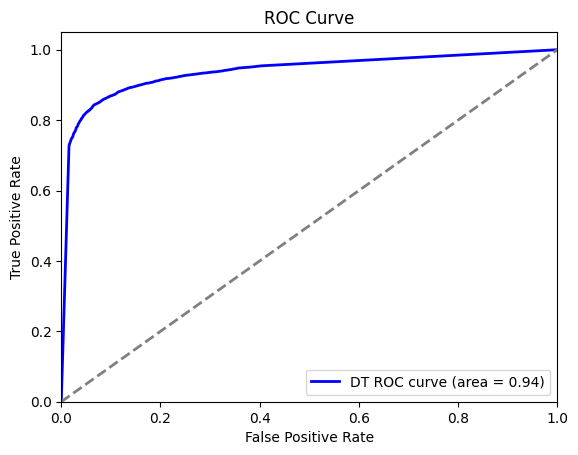

In [13]:
# Calculate ROC AUC for the testing set
dt_y_test_proba = optimized_dt_model.predict_proba(X_test)[:, 1]
dt_test_roc_auc = roc_auc_score(y_test, dt_y_test_proba)
print(f"DT Test ROC AUC: {dt_test_roc_auc:.4f}")

# Plot ROC curve for testing set
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_test_proba)
dt_roc_auc = auc(dt_fpr, dt_tpr)

plt.figure()
plt.plot(dt_fpr, dt_tpr, color='blue', lw=2, label=f'DT ROC curve (area = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

Confusion Matrix:
[[11793  1087]
 [ 1821 11043]]


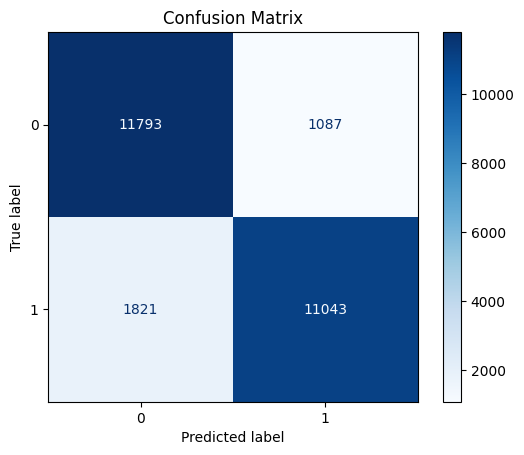

In [ ]:
# Calculate and print confusion matrix
dt_confusion_matrix = confusion_matrix(y_test, optimized_dt_test_predictions)
print("Confusion Matrix:")
print(dt_confusion_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

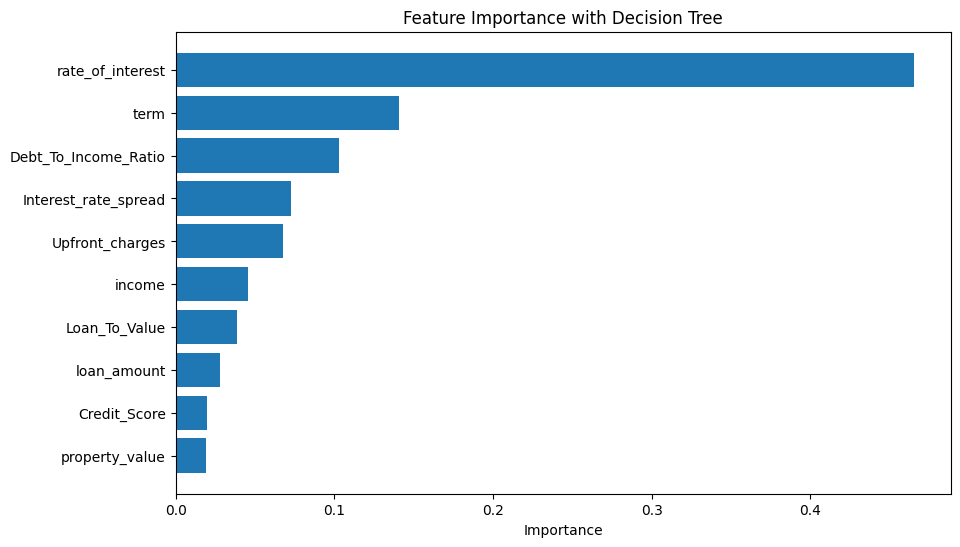

In [ ]:
# Calculate and plot feature importance
importances = optimized_dt_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance with Decision Tree")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), names)
plt.xlabel("Importance")
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib_file = "optimized_dt_model.joblib"
joblib.dump(optimized_dt_model, joblib_file)
print(f"Model saved as {joblib_file}")

Model saved as optimized_dt_model.joblib


# =================================================

# XGBoost

## XGBoost Base Model

In [ ]:
# # Define the parameters for the XGBoost model
base_model_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42,
    'n_estimators': 100,     
    'max_depth': 3,             
    'learning_rate': 0.1,      
    'subsample': 0.8,           
    'colsample_bytree': 0.8,   
    'gamma': 0                 
}

# Train a XGBoost model
base_model = xgb.XGBClassifier(**base_model_params)
base_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate on the training set
base_train_predictions = base_model.predict(X_train)
base_train_accuracy = accuracy_score(y_train, base_train_predictions)
print(f"Training Accuracy: {base_train_accuracy:.4f}")

# Evaluate on the testing set
base_test_predictions = base_model.predict(X_test)
base_test_accuracy = accuracy_score(y_test, base_test_predictions)
print(f"Testing Accuracy: {base_test_accuracy:.4f}")

# Print classification report for training set
print("Classification Report on Training Set:")
print(classification_report(y_train, base_train_predictions))

# Print classification report for testing set
print("Classification Report on Testing Set:")
print(classification_report(y_test, base_test_predictions))

Training Accuracy: 0.8850
Testing Accuracy: 0.8834
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     51480
           1       0.92      0.84      0.88     51496

    accuracy                           0.89    102976
   macro avg       0.89      0.89      0.88    102976
weighted avg       0.89      0.89      0.88    102976

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12880
           1       0.92      0.84      0.88     12864

    accuracy                           0.88     25744
   macro avg       0.89      0.88      0.88     25744
weighted avg       0.89      0.88      0.88     25744



## XGBoost Grid Seacch

### Define the Parameter Grid

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

### Initialize the Model and GridSearchCV

In [ ]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Initialize GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, n_jobs=6, verbose=2)

### Fit the Model

In [ ]:
# Fit GridSearchCV to the training data
xgb_grid_result = xgb_grid.fit(X_train, y_train)

print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"Best Score: {xgb_grid.best_score_:.4f}")

# Display detailed results
means = xgb_grid_result.cv_results_['mean_test_score']
stds = xgb_grid_result.cv_results_['std_test_score']
params = xgb_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

Fitting 10 folds for each of 4096 candidates, totalling 40960 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.9}
Best Score: 0.9372
0.680780 (0.006199) with: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.681227 (0.004927) with: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
0.680887 (0.005473) with: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
0.680353 (0.006281) with: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.705786 (0.008093) with: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
0.706679 (0.006410) with: {'colsample_bytree': 0.7, 'gamma': 0, 'learn

### Evaluate the Best Model

In [ ]:
best_model = xgb_grid.best_estimator_

train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.4f}")

print("Classification Report on Training Set:")
print(classification_report(y_train, train_predictions))

print("Classification Report on Testing Set:")
print(classification_report(y_test, test_predictions))

Training Accuracy: 0.9654
Testing Accuracy: 0.9369
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     51480
           1       1.00      0.93      0.96     51496

    accuracy                           0.97    102976
   macro avg       0.97      0.97      0.97    102976
weighted avg       0.97      0.97      0.97    102976

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12880
           1       0.97      0.90      0.93     12864

    accuracy                           0.94     25744
   macro avg       0.94      0.94      0.94     25744
weighted avg       0.94      0.94      0.94     25744



## Comparison Table

In [ ]:
# Convert best_params to a string
best_params_str = str(xgb_grid.best_params_)

# Set display options to show full content
pd.set_option('display.max_colwidth', None)

# Comparison Table
data = {
    "Metric": ["Training Accuracy", "Testing Accuracy", "Best Parameters"],
    "Base Model": [base_train_accuracy, base_test_accuracy, base_model_params],
    "Grid Search Model": [train_accuracy, test_accuracy, xgb_grid.best_params_]
}

comparison_table = pd.DataFrame(data)
comparison_table

,Metric,Base Model,Grid Search Model
0,Training Accuracy,0.885002,0.965439
1,Testing Accuracy,0.883351,0.936878
2,Best Parameters,"{'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0}","{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.9}"


## Final Model

### Define the parameter Grid

In [3]:
# Define the parameters for the optimized XGBoost model
optimized_xgb_model_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 1.0,
    'gamma': 0.1,
    'learning_rate': 0.2,
    'max_depth': 6,
    'n_estimators': 400,
    'subsample': 0.9,
    'random_state': 42
}

### Train the optimized Decision Tree model

In [4]:
optimized_xgb_model = xgb.XGBClassifier(**optimized_xgb_model_params)
optimized_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Result

In [5]:
# Evaluate on the training set
optimized_xgb_train_predictions = optimized_xgb_model.predict(X_train)
optimized_xgb_train_accuracy = accuracy_score(y_train, optimized_xgb_train_predictions)
print(f"Optimized Training Accuracy: {optimized_xgb_train_accuracy:.4f}")

# Evaluate on the testing set
optimized_xgb_test_predictions = optimized_xgb_model.predict(X_test)
optimized_xgb_test_accuracy = accuracy_score(y_test, optimized_xgb_test_predictions)
print(f"Optimized Testing Accuracy: {optimized_xgb_test_accuracy:.4f}")

# Print classification report for training set
print("Optimized Classification Report on Training Set:")
print(classification_report(y_train, optimized_xgb_train_predictions))

# Print classification report for testing set
print("Optimized Classification Report on Testing Set:")
print(classification_report(y_test, optimized_xgb_test_predictions))

Optimized Training Accuracy: 0.9654
Optimized Testing Accuracy: 0.9369
Optimized Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     51480
           1       1.00      0.93      0.96     51496

    accuracy                           0.97    102976
   macro avg       0.97      0.97      0.97    102976
weighted avg       0.97      0.97      0.97    102976

Optimized Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12880
           1       0.97      0.90      0.93     12864

    accuracy                           0.94     25744
   macro avg       0.94      0.94      0.94     25744
weighted avg       0.94      0.94      0.94     25744



### Plot ROC Curve

XGB Test ROC AUC: 0.9713


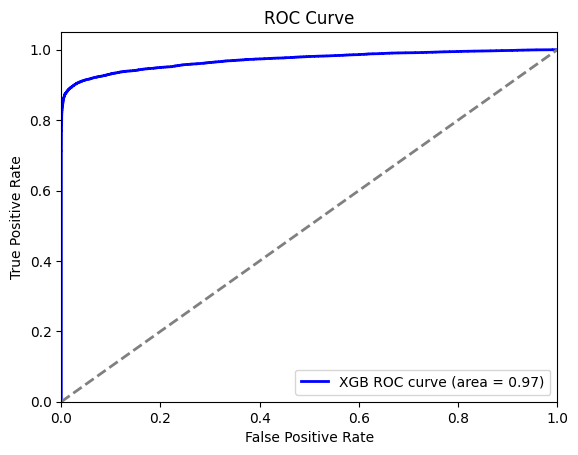

In [6]:
# Calculate ROC AUC for the testing set
xgb_y_test_proba = optimized_xgb_model.predict_proba(X_test)[:, 1]
xgb_test_roc_auc = roc_auc_score(y_test, xgb_y_test_proba)
print(f"XGB Test ROC AUC: {xgb_test_roc_auc:.4f}")

# Plot ROC curve for testing set
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_test_proba)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

plt.figure()
plt.plot(xgb_fpr, xgb_tpr, color='blue', lw=2, label=f'XGB ROC curve (area = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

Confusion Matrix:
[[12561   319]
 [ 1306 11558]]


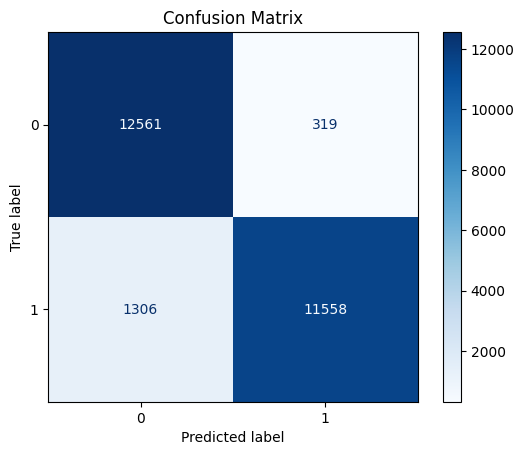

In [7]:
# Calculate and print confusion matrix
xgb_confusion_matrix = confusion_matrix(y_test, optimized_xgb_test_predictions)
print("Confusion Matrix:")
print(xgb_confusion_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_confusion_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

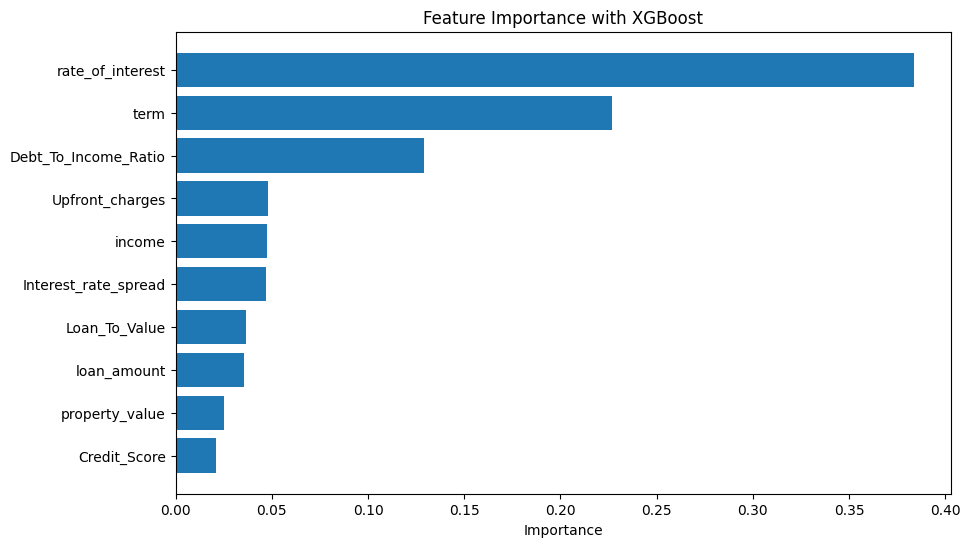

In [8]:
# Calculate and plot feature importance
importances = optimized_xgb_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance with XGBoost")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), names)
plt.xlabel("Importance")
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()

In [ ]:
# Save the model to a file
joblib_file = "optimized_xgb_model.joblib"
joblib.dump(optimized_xgb_model, joblib_file)
print(f"Model saved as {joblib_file}")

Model saved as optimized_xgb_model.joblib


# =================================================

# Hybrid Model (Voting)

## Initialize Base Models with Best Parameters

In [25]:
random_forest = RandomForestClassifier(n_estimators=500, min_samples_split=40, min_samples_leaf=8, 
                                       max_features=None, max_depth=None, criterion='entropy', bootstrap=True, random_state=42)

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=59, min_samples_leaf=6, 
                                       min_samples_split=35, random_state=42)

xgboost = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, 
                            n_estimators=400, subsample=0.9, objective='binary:logistic', eval_metric='logloss', random_state=42)

## Initialize and Fit Voting Classifier

In [26]:
voting_clf = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('decision_tree', decision_tree),
    ('xgboost', xgboost)
], voting='soft')  # 'soft' for averaging predicted probabilities

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=None,
                                                     min_samples_leaf=8,
                                                     min_samples_split=40,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=59,
                                                     min_samples_leaf=6,
                                                     min_samples_split=35,
                                                     random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=400, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

## Evaluate the result

In [ ]:
train_predictions = voting_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_predictions = voting_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.4f}")

print("Classification Report on Training Set:")
print(classification_report(y_train, train_predictions))

print("Classification Report on Testing Set:")
print(classification_report(y_test, test_predictions))

Training Accuracy: 0.9620
Testing Accuracy: 0.9311
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     51480
           1       0.98      0.94      0.96     51496

    accuracy                           0.96    102976
   macro avg       0.96      0.96      0.96    102976
weighted avg       0.96      0.96      0.96    102976

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12880
           1       0.96      0.90      0.93     12864

    accuracy                           0.93     25744
   macro avg       0.93      0.93      0.93     25744
weighted avg       0.93      0.93      0.93     25744



## Calculate and Plot ROC AUC

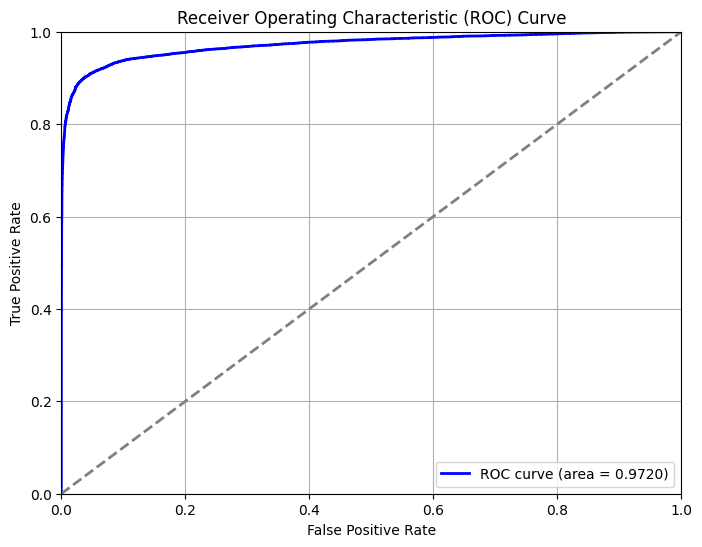

In [28]:
test_probs = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Confusion Matrix:
[[12347   533]
 [ 1240 11624]]


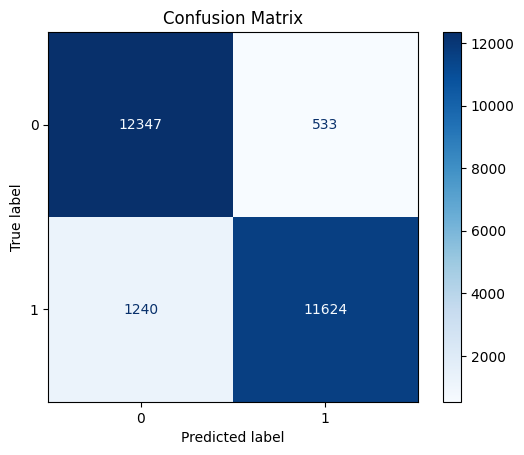

In [29]:
# Calculate and print confusion matrix
hybrid_confusion_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(hybrid_confusion_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=hybrid_confusion_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib_file = "optimized_hybrid_model.joblib"
joblib.dump(voting_clf, joblib_file)
print(f"Model saved as {joblib_file}")

Model saved as optimized_hybrid_model.joblib


# =================================================

# 4 Models Comparision Table

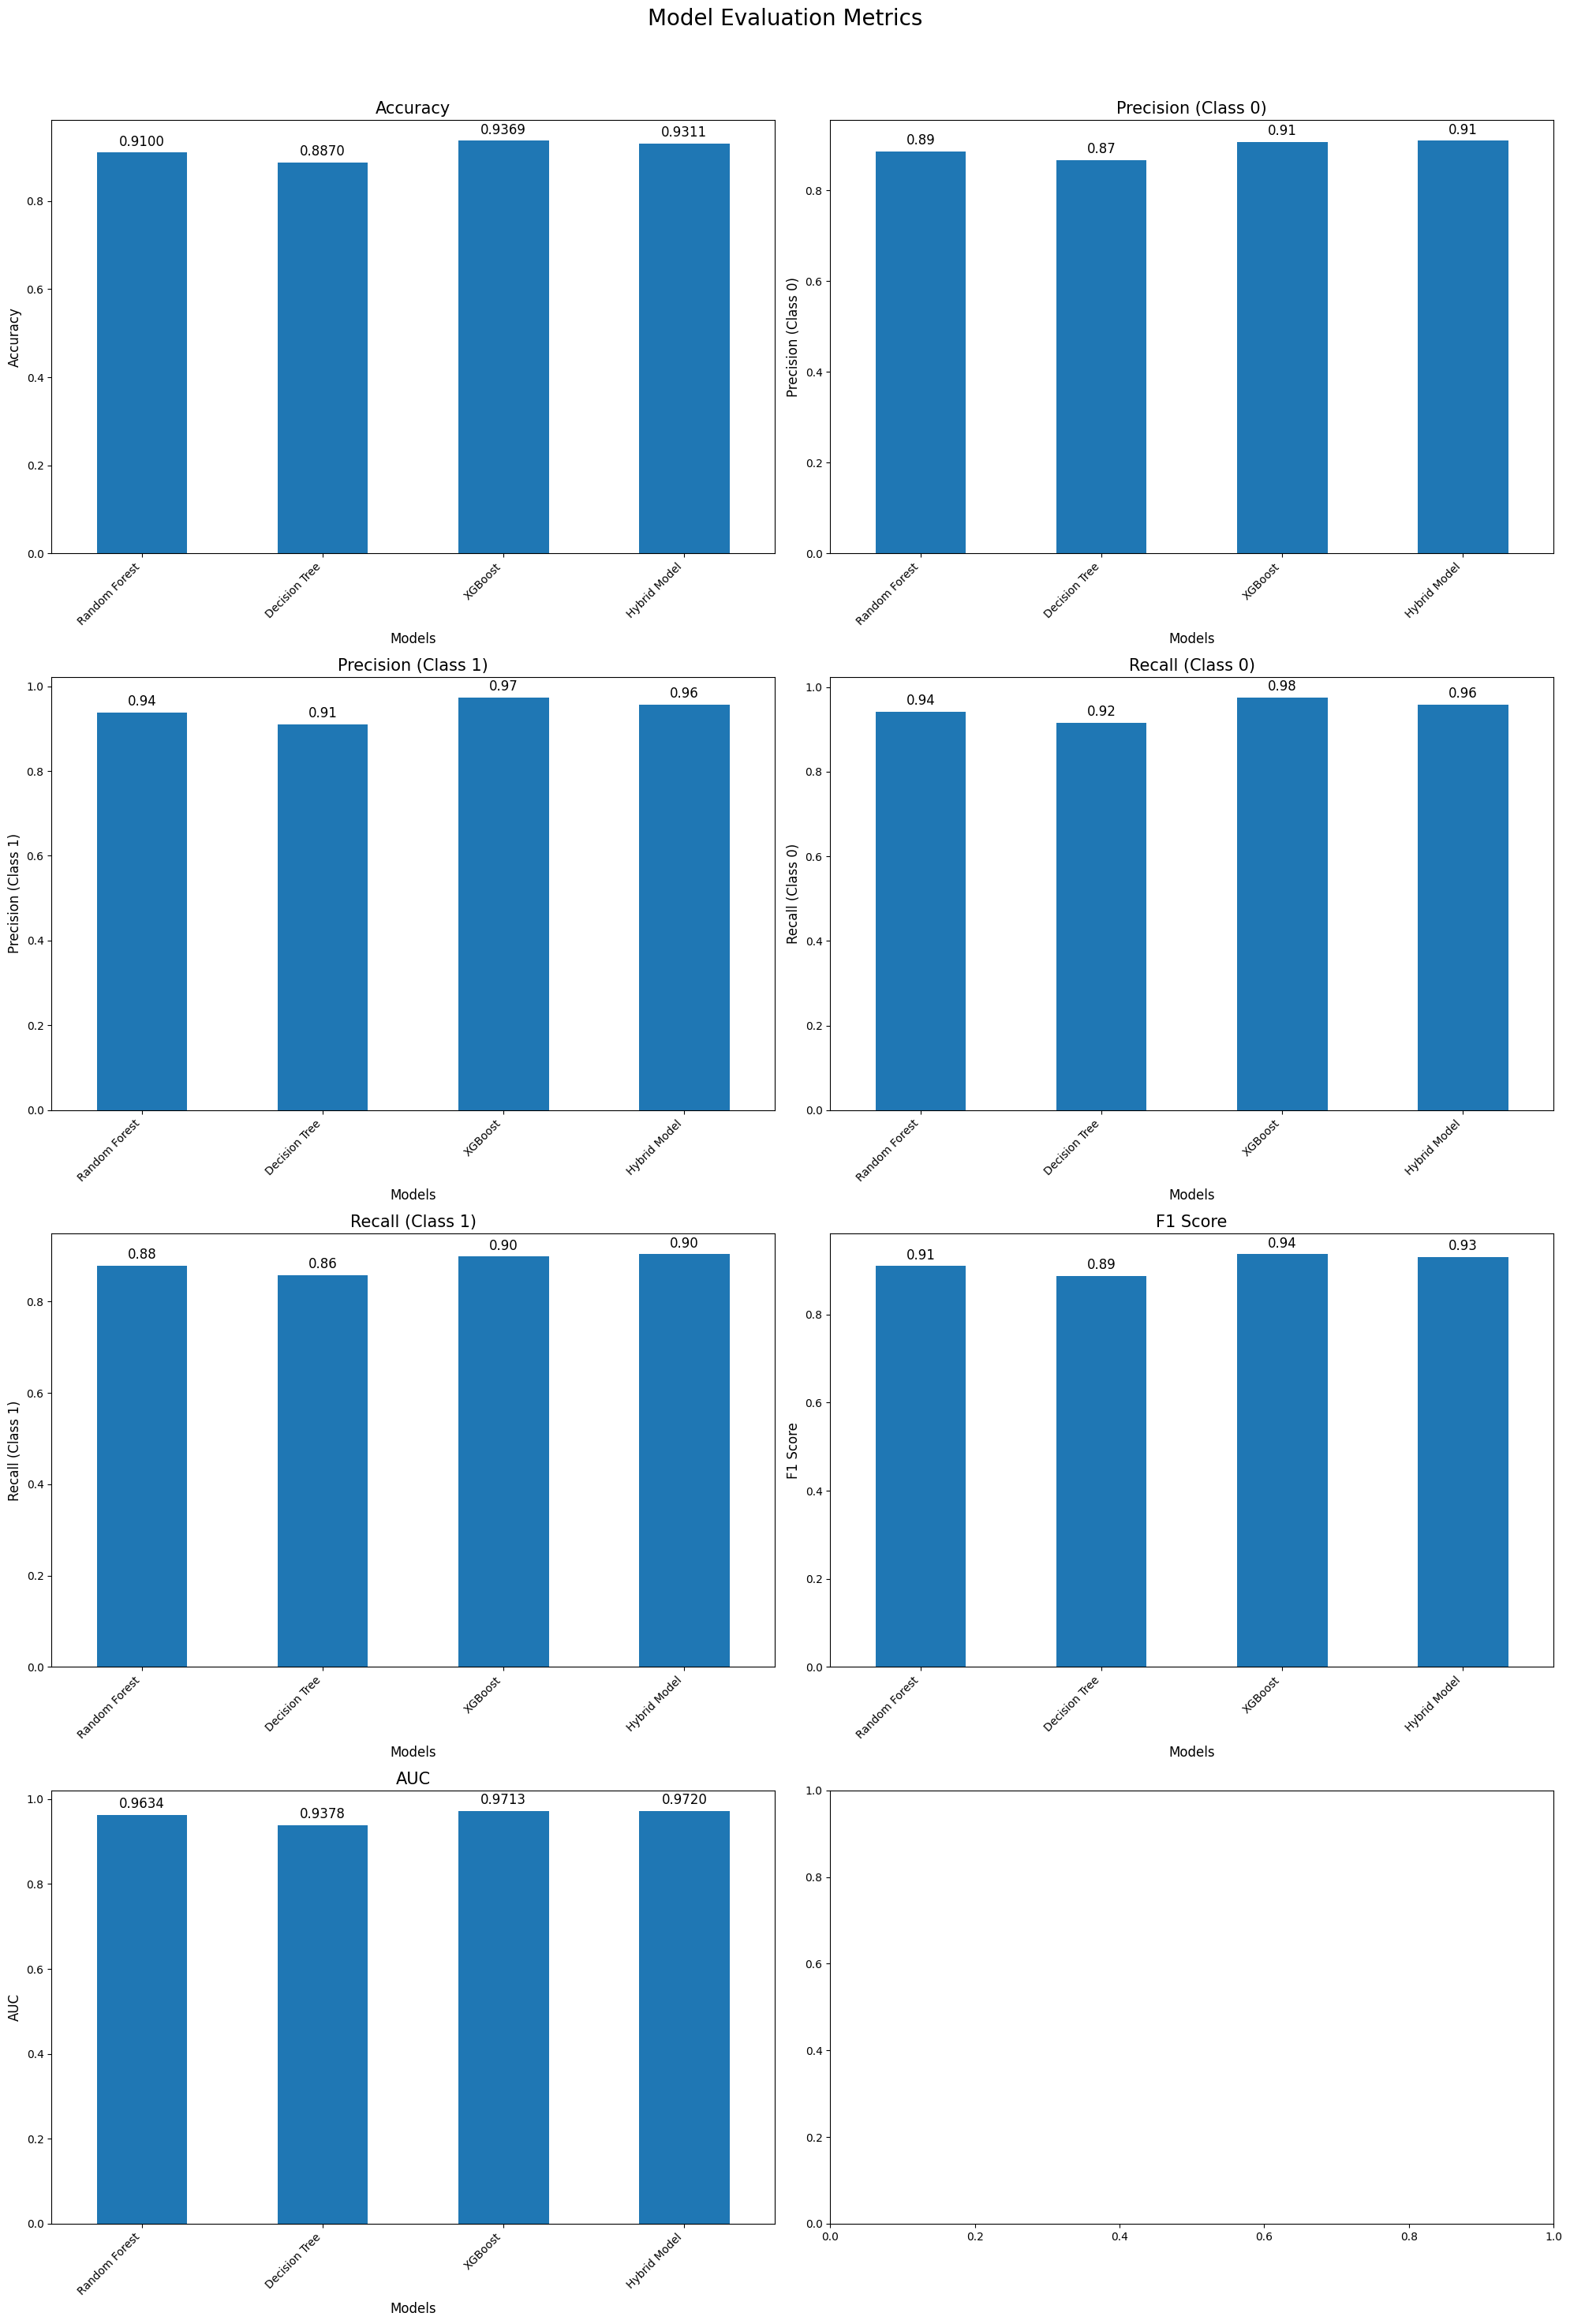

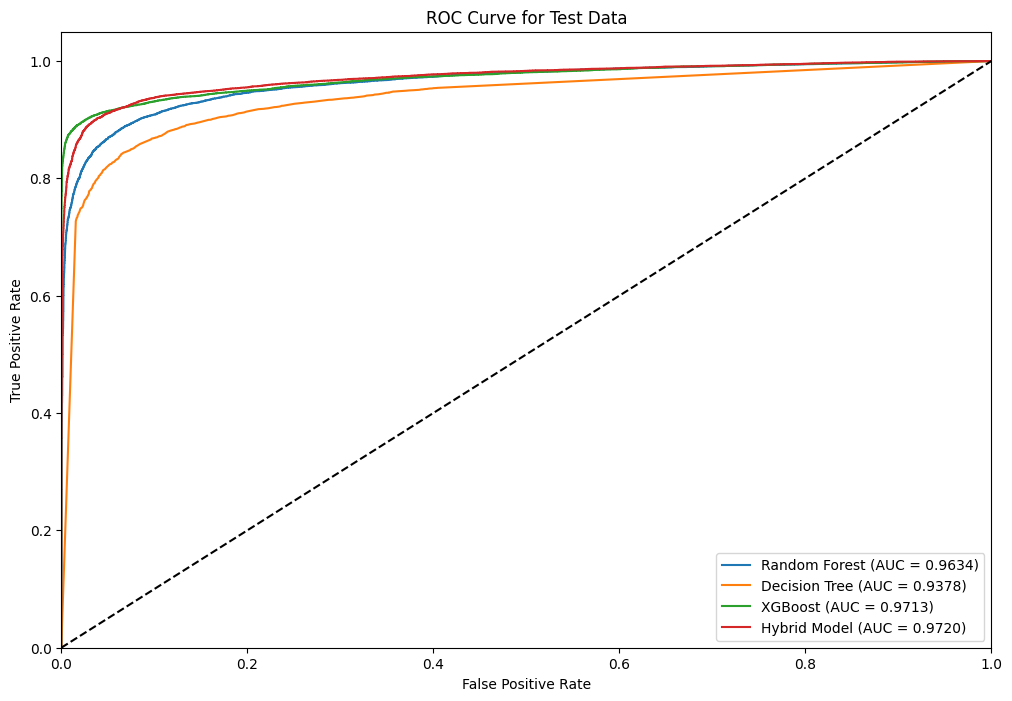

In [23]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the models
rf_model = joblib.load("optimized_rf_model.joblib")
dt_model = joblib.load("optimized_dt_model.joblib")
xgb_model = joblib.load("optimized_xgb_model.joblib")
hybrid_model = joblib.load("optimized_hybrid_model.joblib")

# Load and prepare the dataset
df = pd.read_excel("C:\\Users\\Chai\\Desktop\\FYP_dataset\\preprocessed_data.xlsx")
X = df.drop('Status', axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,
    'Hybrid Model': hybrid_model
}

# Evaluate models
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Class 0)': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Precision (Class 1)': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'Recall (Class 0)': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'Recall (Class 1)': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC': roc_auc_score(y_test, y_pred_proba),
        'ROC Curve': roc_curve(y_test, y_pred_proba)
    }

# Prepare results for plotting
results_df = pd.DataFrame(results).T[['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 
                                      'Recall (Class 0)', 'Recall (Class 1)', 'F1 Score', 'AUC']]
evaluation_metrics = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 
                      'Recall (Class 0)', 'Recall (Class 1)', 'F1 Score', 'AUC']

# Plotting the results
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle('Model Evaluation Metrics', fontsize=20)
axes = axes.flatten()

for idx, metric in enumerate(evaluation_metrics):
    if idx < len(axes):
        ax = axes[idx]
        metric_values = results_df[metric]
        metric_values.plot(kind='bar', ax=ax)
        ax.set_title(metric, fontsize=15)
        ax.set_ylabel(metric, fontsize=12)
        ax.set_xlabel('Models', fontsize=12)
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(results_df.index, rotation=45, ha='right')
        
        for p in ax.patches:
            if metric in ['Accuracy', 'AUC']:
                value = f'{p.get_height():.4f}'
            else:
                value = f'{p.get_height():.2f}'
            ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), 
                        textcoords='offset points', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot ROC Curves
plt.figure(figsize=(12, 8))
for model_name, result in results.items():
    if result['ROC Curve'] is not None:
        fpr, tpr, _ = result['ROC Curve']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc="lower right")
plt.show()